In [35]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
df=pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [21]:
df.dtypes

sepal_length         float64
sepal_width          float64
petal_length         float64
petal_width          float64
species               object
Predicted Species      int32
dtype: object

In [20]:
df.shape

(150, 6)

In [19]:
df.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [26]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [27]:
df.nunique()

sepal_length         35
sepal_width          23
petal_length         43
petal_width          22
species               3
Predicted Species     3
dtype: int64

In [33]:
fig = px.histogram(data_frame=df, x='species', title='total num of species', color='species')
fig.show()

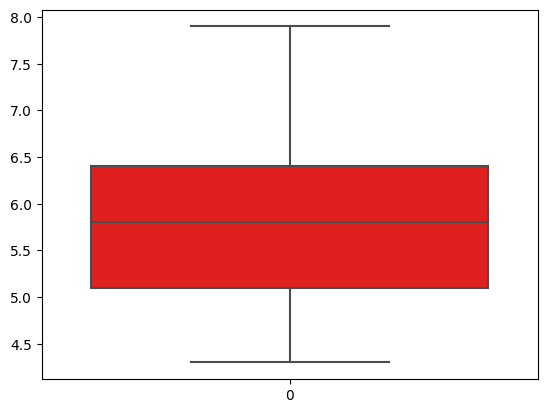

In [36]:
sns.boxplot(df['sepal_length'],color='red')
plt.show()

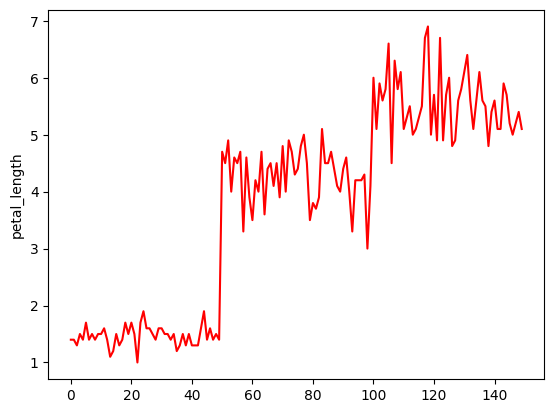

In [40]:
sns.lineplot(df['petal_length'],color='red')
plt.show()

In [42]:
fig1 = px.histogram(df, x="species", color="sepal_length")
fig1.show()

In [44]:
fig2 = px.histogram(df, x="species", color="petal_width")
fig2.show()

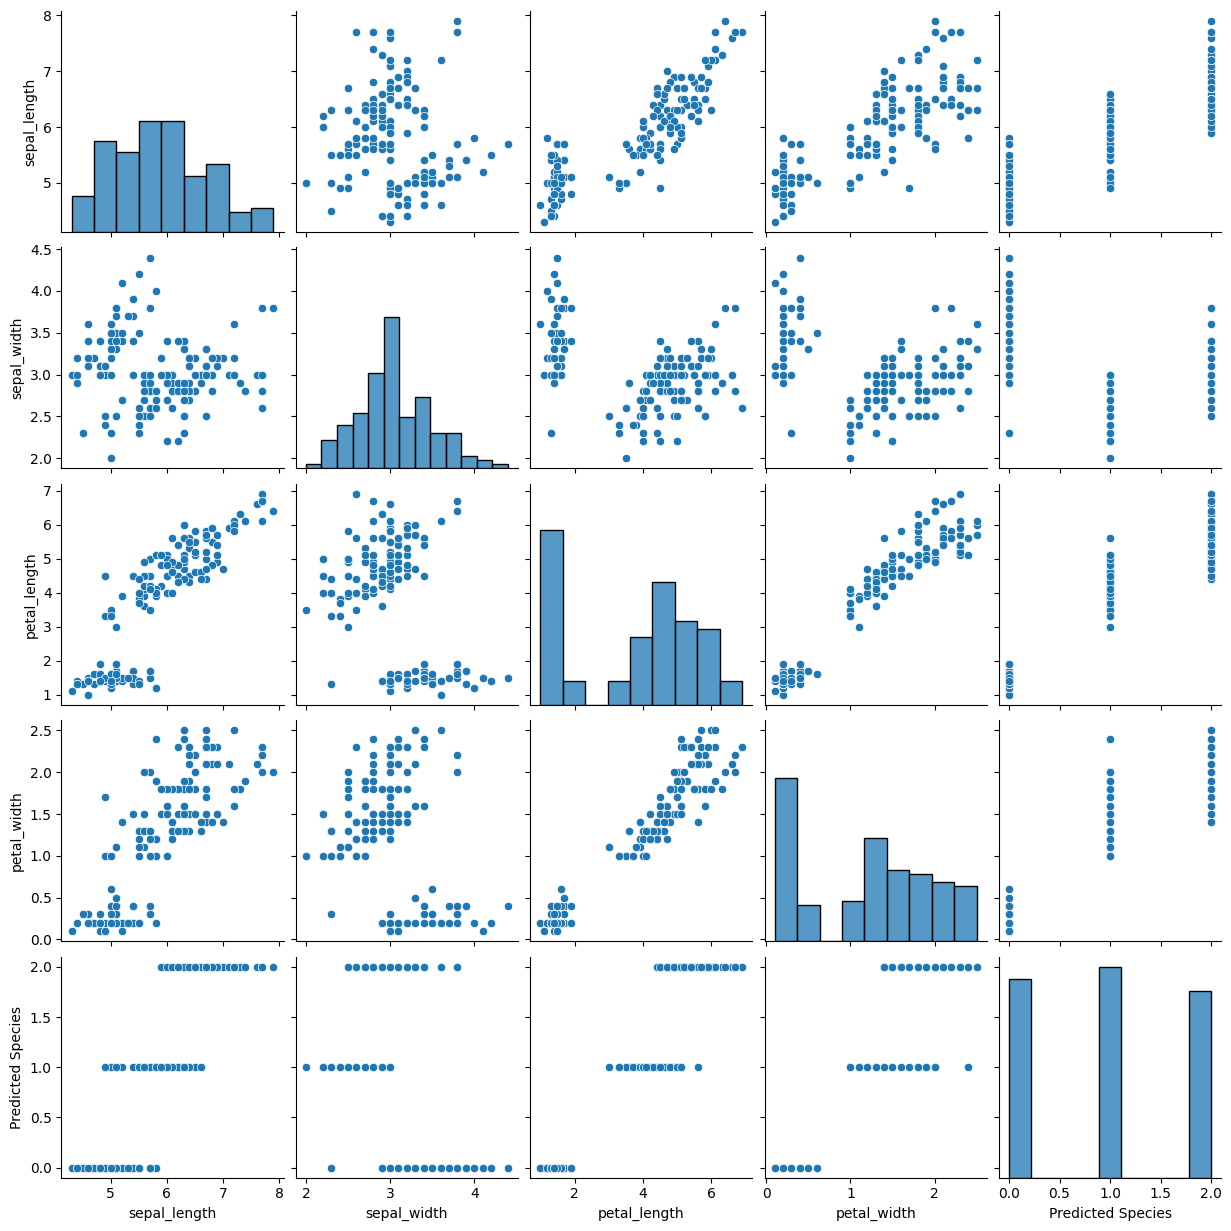

In [46]:
sns.pairplot(df)

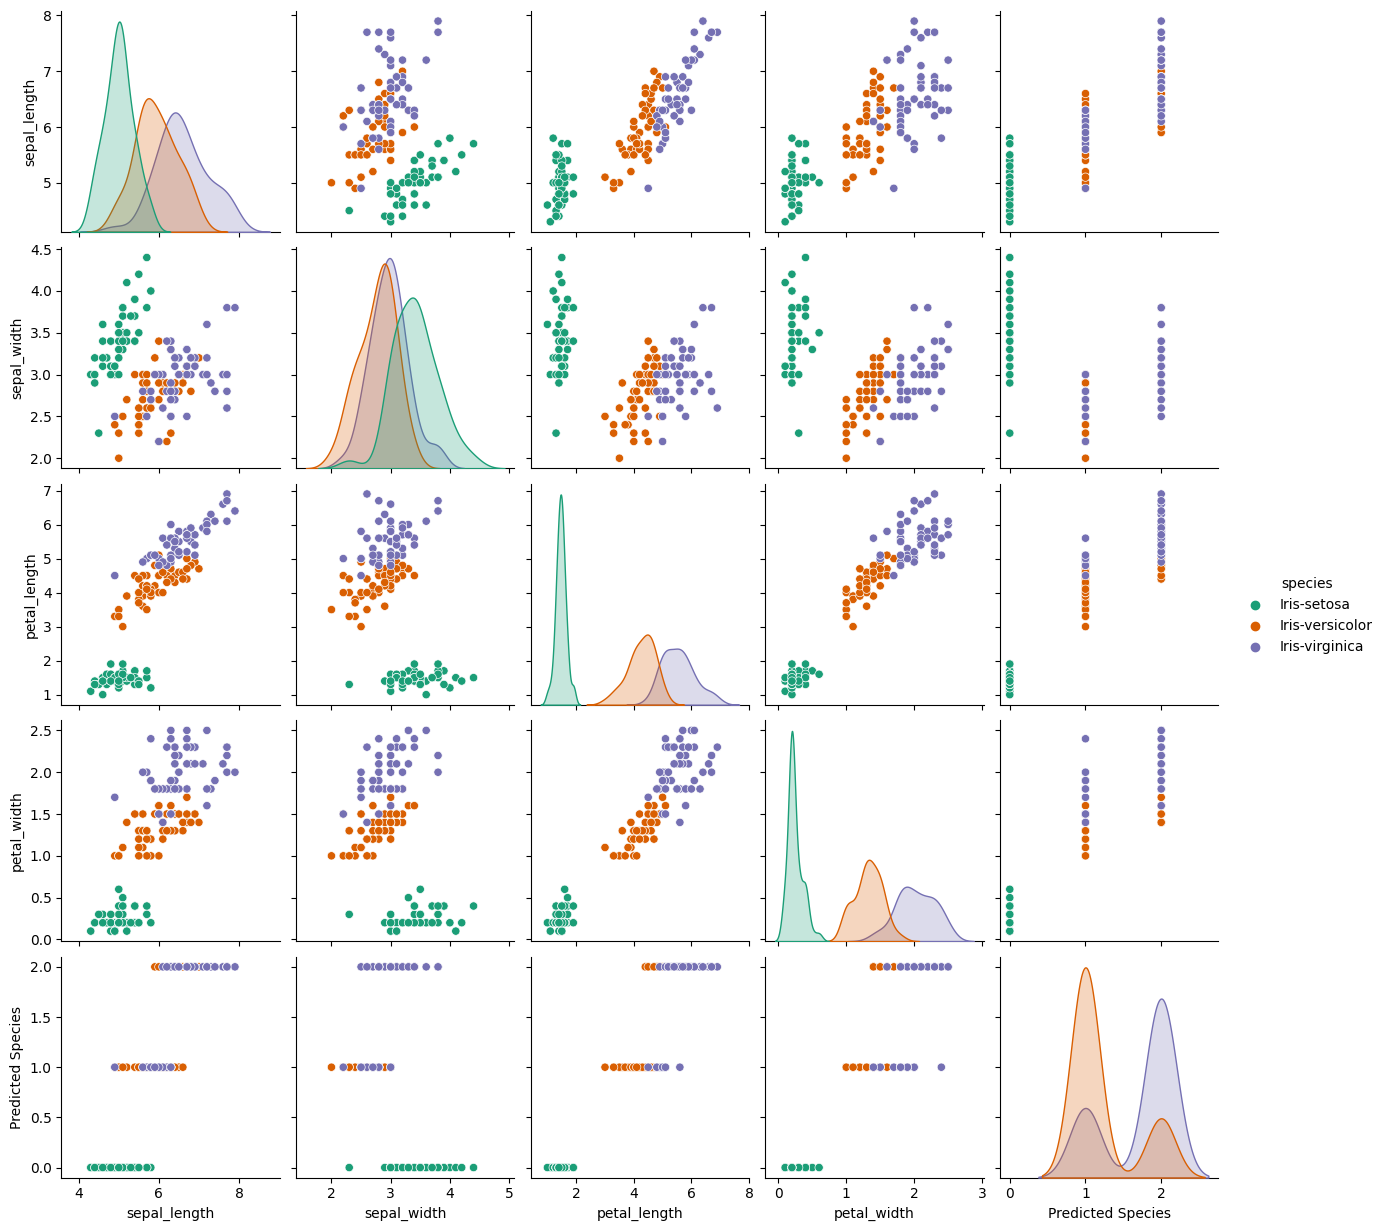

In [47]:
sns.pairplot(df,hue='species',palette='Dark2');

In [50]:
X = df.drop(['species'], axis=1)
y = df['species']

In [52]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width,Predicted Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [53]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state= 32)  #Splitting train and test set

In [58]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(X_train,y_train)
acc_knn = model.score(X_test, y_test)*100
print("Accuracy (KNN): ",acc_knn)

Accuracy (KNN):  96.66666666666667


In [63]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
acc_lr = model.score(X_test, y_test)*100
print("Accuracy: ",acc_lr)


Accuracy:  100.0


<Axes: xlabel='Accuracy', ylabel='Models'>

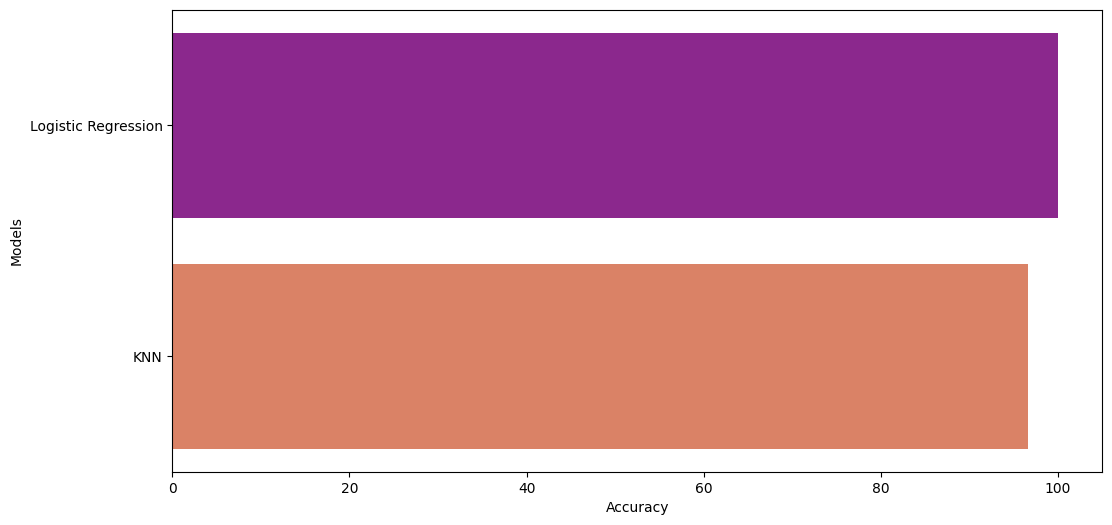

In [64]:
plt.figure(figsize=(12,6))
model_acc = [acc_lr,acc_knn]
model_name = ['Logistic Regression','KNN']
plt.xlabel("Accuracy")
plt.ylabel("Models")
sns.barplot(x=model_acc, y=model_name, palette='plasma')